In [73]:
# загрузка библиотек
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from datetime import date,timedelta
import seaborn as sb
import seaborn as sns

In [54]:
# загрузка датасета
df = pd.read_csv('cars.csv')

In [55]:
# выводим таблицу
df

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,Nissan,Altima,2010,3.6,Petrol,72037.65
...,...,...,...,...,...,...
9995,BMW,3 Series,2018,1.9,Hybrid,31676.02
9996,Hyundai,Sonata,2011,2.6,Diesel,67942.46
9997,Chevrolet,Impala,2011,1.3,Electric,64342.88
9998,BMW,X3,2020,1.4,Diesel,50060.30


In [56]:
#информация по датасету
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             10000 non-null  object 
 1   Model            10000 non-null  object 
 2   Year             10000 non-null  int64  
 3   Engine Size (L)  10000 non-null  float64
 4   Fuel Type        10000 non-null  object 
 5   Price (USD)      10000 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 468.9+ KB
None


In [57]:
# смотрим типы данных 
df.dtypes

Make                object
Model               object
Year                 int64
Engine Size (L)    float64
Fuel Type           object
Price (USD)        float64
dtype: object

In [58]:
#смотрим количество строк и столбцов
df.shape

(10000, 6)

In [59]:
#смотрим сколько производителей авто всего
df.Make.nunique()

10

In [60]:
# и посмотрим сколько моделей авто всего
df.Model.nunique()

50

In [61]:
# смотрим сколько кто выпустил авто
df.Make.value_counts()

Make
Nissan           1032
Volkswagen       1029
Chevrolet        1025
Audi             1019
Hyundai          1011
Honda             989
BMW               986
Ford              975
Mercedes-Benz     973
Toyota            961
Name: count, dtype: int64

In [62]:
# проанализируем марку BMW, создадим новый датафрейм
bmw_df=df[df['Make']=='BMW']
bmw_df
#print(bmw_df.head())
#print(bmw_df.describe())

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
7,BMW,7 Series,2018,4.0,Diesel,21455.06
10,BMW,3 Series,2013,2.9,Electric,58034.53
17,BMW,3 Series,2020,4.9,Hybrid,16680.51
25,BMW,7 Series,2014,3.7,Diesel,48173.02
30,BMW,5 Series,2020,3.7,Petrol,79866.56
...,...,...,...,...,...,...
9973,BMW,X5,2017,4.1,Hybrid,63282.67
9979,BMW,7 Series,2019,4.1,Diesel,79948.44
9994,BMW,7 Series,2010,2.2,Electric,61067.71
9995,BMW,3 Series,2018,1.9,Hybrid,31676.02


In [63]:
# посмотрим каких моделей и в каком году больше всего выпустили
bmw_df.groupby('Model', as_index=False).aggregate({'Year':'max'}).sort_values('Year', ascending=False)

,Model,Year
0,3 Series,2020
1,5 Series,2020
2,7 Series,2020
3,X3,2020
4,X5,2020


In [65]:
# смотрим модели по кол-ву выпусков 
bmw_df.Model.value_counts()

Model
5 Series    220
3 Series    205
X3          201
X5          181
7 Series    179
Name: count, dtype: int64

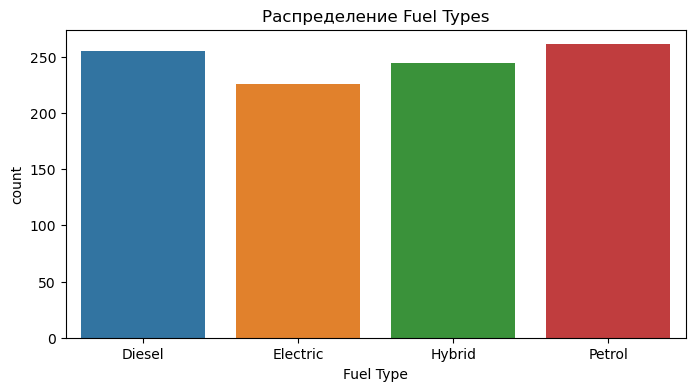

In [76]:
# посмотрим на выпущенные машины БМВ в разрезе типа двигателя
if 'Fuel Type' in bmw_df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='Fuel Type', data=bmw_df)
    plt.title('Распределение Fuel Types')
    plt.xlabel('Fuel Type')
else:
    print("Column 'Fuel Type' not found in the dataset.")

Average BMW Models Price per Year


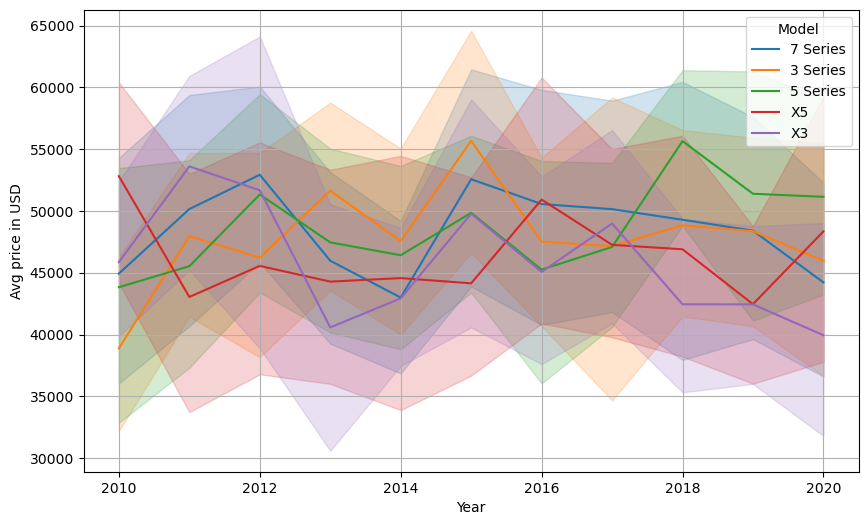

In [77]:
# смотрим на средние цены в зависимости от моделей
plt.figure(figsize=(10,6))
sb.lineplot(data=bmw_df,x='Year',y='Price (USD)',hue='Model',estimator='mean',palette='tab10')
print('Average BMW Models Price per Year')
plt.xlabel("Year")
plt.ylabel("Avg price in USD")
plt.grid(True)
plt.show()

In [82]:
# сделаем датафрейм где оставим для анализа только Nissan и ВMW
check = df.query("Make == 'Nissan' or Make == 'BMW' ")
check

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
4,Nissan,Altima,2010,3.6,Petrol,72037.65
7,BMW,7 Series,2018,4.0,Diesel,21455.06
10,BMW,3 Series,2013,2.9,Electric,58034.53
11,Nissan,Sentra,2019,4.6,Diesel,60734.86
...,...,...,...,...,...,...
9987,Nissan,Rogue,2016,2.4,Hybrid,47196.90
9988,Nissan,Sentra,2014,2.2,Diesel,32694.80
9994,BMW,7 Series,2010,2.2,Electric,61067.71
9995,BMW,3 Series,2018,1.9,Hybrid,31676.02


In [84]:
# посмотрим у какого производителя какая модель выпускалась больше
top_Model = check.groupby(['Make'], as_index=False) \
        .aggregate({'Model': 'max'}) \
        .query("Make == 'Nissan' or Make == 'BMW'") \
        .sort_values('Model', ascending=False)

top_Model

,Make,Model
0,BMW,X5
1,Nissan,Versa


In [87]:
# посмотрим всю инфу по данным авто и моделям
X5 = check.query("Make == 'BMW' and Model == 'X5'")
Versa = check.query("Make == 'Nissan' and Model == 'Versa'")

In [88]:
X5

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
59,BMW,X5,2011,2.7,Petrol,31799.16
180,BMW,X5,2010,4.7,Diesel,71218.99
217,BMW,X5,2014,3.0,Hybrid,61183.51
253,BMW,X5,2012,3.0,Diesel,26164.75
272,BMW,X5,2015,3.2,Hybrid,36879.05
...,...,...,...,...,...,...
9798,BMW,X5,2018,3.1,Hybrid,25001.71
9827,BMW,X5,2012,4.4,Petrol,29422.93
9886,BMW,X5,2012,2.6,Hybrid,33338.70
9907,BMW,X5,2015,2.4,Electric,56000.67


In [89]:
Versa

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
34,Nissan,Versa,2015,2.4,Diesel,15993.89
199,Nissan,Versa,2015,2.6,Hybrid,23638.96
238,Nissan,Versa,2013,4.6,Electric,42099.47
243,Nissan,Versa,2014,1.7,Diesel,51353.73
268,Nissan,Versa,2014,4.0,Electric,56424.89
...,...,...,...,...,...,...
9657,Nissan,Versa,2014,4.8,Hybrid,68669.83
9690,Nissan,Versa,2010,1.4,Petrol,49134.65
9846,Nissan,Versa,2010,4.2,Hybrid,39872.12
9883,Nissan,Versa,2013,4.7,Hybrid,68201.17


Цена машин БМВ


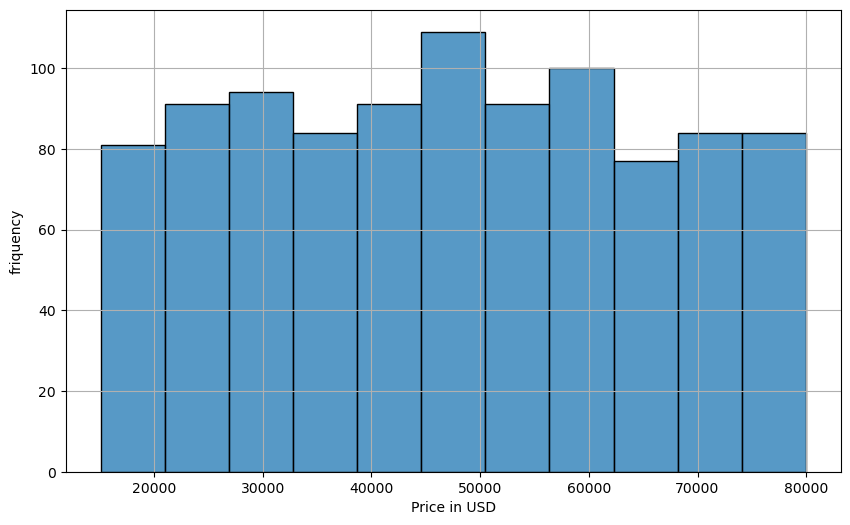

In [100]:
# посмотрим частоту распределения цен на машины БМВ
plt.figure(figsize=(10,6))
sb.histplot(bmw_df['Price (USD)'])
plt.xlabel('Price in USD')
plt.ylabel('friquency')
plt.grid(True)
print("Цена машин БМВ")
plt.show()

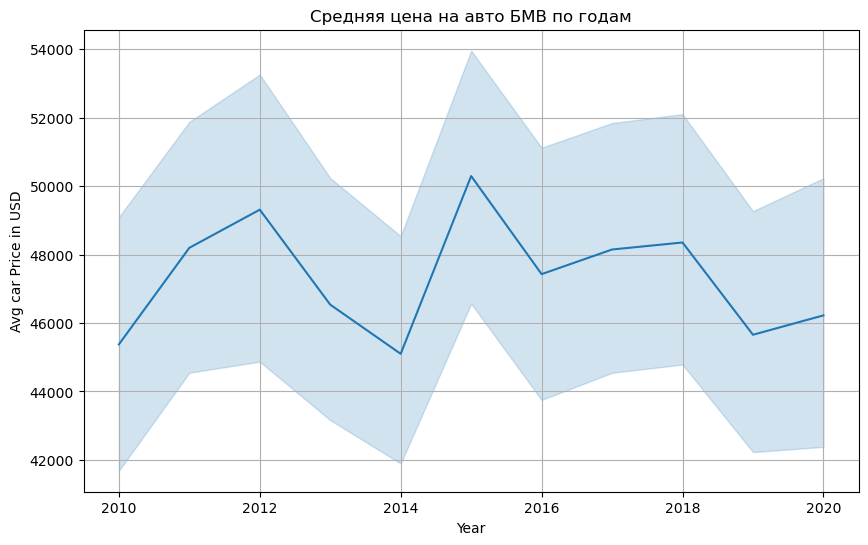

In [106]:
# посмотрим среднюю цену в разные года на авто БМВ
plt.figure(figsize=(10,6))
sb.lineplot(x="Year",y='Price (USD)',data=bmw_df,estimator='mean')
plt.grid(True)
plt.title('Средняя цена на авто БМВ по годам')
plt.xlabel("Year")
plt.ylabel("Avg car Price in USD")
plt.show()

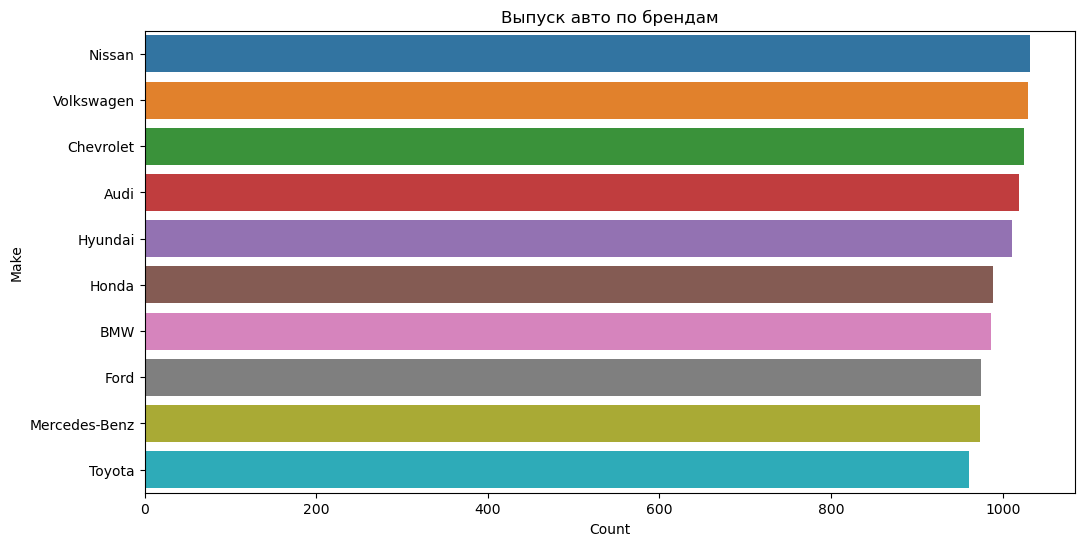

In [108]:
# визуализируем кол-во выпущенных авто по брендам
if 'Make' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Make', data=df, order=df['Make'].value_counts().index)
    plt.title('Выпуск авто по брендам')
    plt.xlabel('Count')
    plt.ylabel('Make')
    plt.show()
else:
    print("Column 'Make' not found in the dataset.")

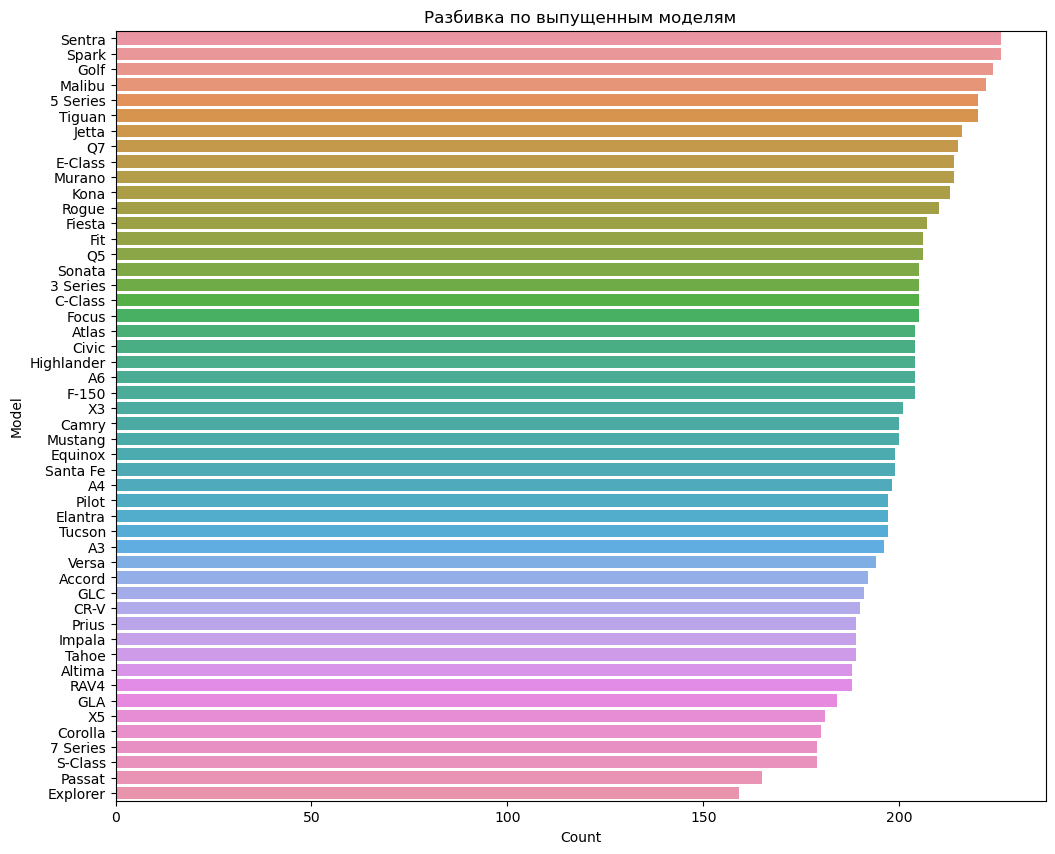

In [109]:
# смотрим разбивку по выпущенным моделям (кол-во)
if 'Model' in df.columns:
    plt.figure(figsize=(12, 10))
    sns.countplot(y='Model', data=df, order=df['Model'].value_counts().index)
    plt.title('Разбивка по выпущенным моделям')
    plt.xlabel('Count')
    plt.ylabel('Model')
    plt.show()
else:
    print("Column 'Model' not found in the dataset.")